In [2]:
import requests as rq
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

# 1 Consumir Dados da url

In [3]:
def lerAPI(url, qtd):  
    if url[-1:] != "/" : 
        url = url + "/?results={}".format(qtd)
    else:
        url = url + "?results={}".format(qtd)       
    return rq.get(url)   

def jsontodf(respon):
    x = respon.json()
    return pd.json_normalize(x, record_path=['results'])


# 2 Armazenar dados em CSV

In [21]:
# dados planos
conteudo = lerAPI("https://randomuser.me/api", 500)
df = jsontodf(conteudo)

# normalize subset 
def normsubset():
    x = conteudo.json()
    df = pd.DataFrame(x['results'])
    return df


In [19]:
df.to_csv('randomuser.csv', sep=',', encoding='utf-8')

# 3 Formato de telefone e celular, transformar em formato único arbitrario

In [5]:
def maskfone(df):
    # deixando apenas números
    df['phone'] = df['phone'].str.replace(r'[^0-9a-zA-Z:,]+', '', regex=True)
    # formato (nnnn)999-99999
    df['phone'] =  '(' + df['phone'].str[:3] + ')' + df['phone'].str[3:6] + '-' + df['phone'].str[6:11]
    df['cell'] = df['cell'].str.replace(r'[^0-9a-zA-Z:,]+', '', regex=True)
    df['cell'] =  '(' + df['cell'].str[:3] + ')' + df['cell'].str[3:6] + '-' + df['cell'].str[6:11]
    return df['cell']


# 4 Agrupamento, porcentagem de usuários por país e gênero

In [6]:
# Agrupamento por gênero
def qtporgenero():
    #ordenar e contar por gênero
    dfsex=df.sort_values(['gender'])
    sex=dfsex.groupby(df['gender']).agg({'email':'count'})
    perc = sex.apply(lambda x:100 * x / float(x.sum()))
    
    torta = dfsex.groupby(['gender']).count().plot(y='email',kind='pie')
    print(torta)
    print(perc)
    perc.to_csv('perc_genero',sep=',', encoding='utf-8')

AxesSubplot(0.22375,0.11;0.5775x0.77)
        email
gender       
female   48.0
male     52.0


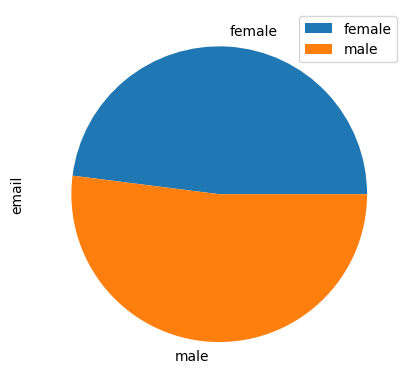

In [47]:
qtporgenero()

In [ ]:
#Agrupamento por país

In [34]:
# extrai location em dataframe
df2 = normsubset()
dfloc = pd.json_normalize(df2['location'])
                          
def percporpais():
    city = dfloc.groupby(['country']).agg({'street.number':'count'})
    dfpais = city.apply(lambda x:100 * x / float(x.sum()))
    torta = dfloc.groupby(['country']).count().plot(y='street.number',kind='pie')
    print(dfpais)
    print(torta)

# 5 Analisando dados com agrupamento 

In [45]:
def usersPaisEstado(df):
    ctr = df.groupby(['location.country','location.state'])["name.first"].count()
    return ctr

# 6 (opcional): Particionando dados

In [24]:
pip install pyarrow

     --------------------------------------- 20.6/20.6 MB 12.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [33]:
from datetime import datetime
import os.path
import pyarrow.parquet as pq
import pyarrow as pa

def FormatoHive(df):
    df['location.postcode'] = df['location.postcode'].astype('string')
    tab = pa.Table.from_pandas(df)
    pq.write_to_dataset(tab, root_path='paisEstado', partition_cols=['location.country', 'location.state'])


# 7 Parametrizando seu código

In [23]:
def main(url, qtd, nmarq):
    conteudo = lerAPI(url, qtd)
    df = jsontodf(conteudo)
    df.to_csv(nmarq, sep=',', encoding='utf-8')
    maskfone(df) # formata phone e cell
    qtporgenero() # qt por genero
    usersPaisEstado(df): #grupa usuários por Pais Estado
    FormatoHive(df) #particionando dados
    
url = "https://randomuser.me/api/?results={}"
qtd = 500
nmarq = "randomuser.csv"

if len(sys.argv) > 1:
    url = sys.argv[1]
    if len(sys.argv)  >2:
        qtd = sys.argv[2]
        if len(sys.argv) > 3:
            nmarq = sys.argv[3]
    
main(url, qtd, nmarq)
